<a href="https://colab.research.google.com/github/Dhanushaiml/Dhanushaiml/blob/main/PERSONAL%20EXPENSE%20TRACKER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Personal Expense Tracker
1. Add expense
2. View summaries
3. Delete expense
4. Edit expense
5. Graphical summary
6. Exit
Choose an option: 1
Enter amount: $200
Enter category: food
Personal Expense Tracker
1. Add expense
2. View summaries
3. Delete expense
4. Edit expense
5. Graphical summary
6. Exit
Choose an option: 2
Total overall spending: $200.00
Total spending by category:
  food: $200.00
Spending over time:
  2024-10-14: $200.00
Personal Expense Tracker
1. Add expense
2. View summaries
3. Delete expense
4. Edit expense
5. Graphical summary
6. Exit
Choose an option: 5


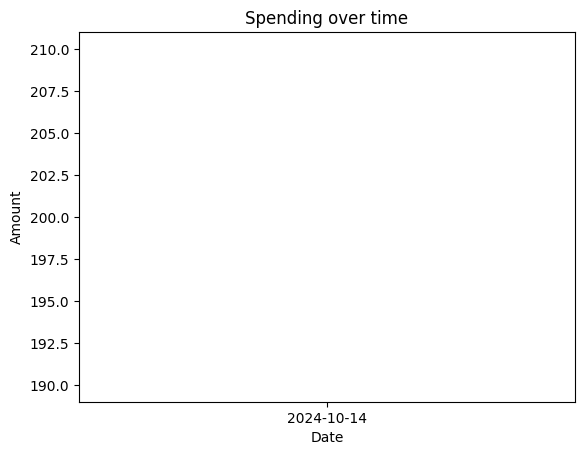

Personal Expense Tracker
1. Add expense
2. View summaries
3. Delete expense
4. Edit expense
5. Graphical summary
6. Exit


In [ ]:
import datetime
import json
import matplotlib.pyplot as plt

# Initialize expense data
expenses = []

# Load existing expenses from file
def load_expenses():
    global expenses
    try:
        with open('expenses.json', 'r') as file:
            expenses = json.load(file)
    except FileNotFoundError:
        pass

# Save expenses to file
def save_expenses():
    with open('expenses.json', 'w') as file:
        json.dump(expenses, file)

# Add expense
def add_expense():
    amount = float(input("Enter amount: $"))
    category = input("Enter category: ")
    date = datetime.date.today()
    expense = {"amount": amount, "category": category, "date": str(date)}
    expenses.append(expense)
    save_expenses()

# View summary
def view_summary():
    total_spending = sum(expense["amount"] for expense in expenses)
    print(f"Total overall spending: ${total_spending:.2f}")
    categories = {}
    for expense in expenses:
        category = expense["category"]
        if category not in categories:
            categories[category] = 0
        categories[category] += expense["amount"]
    print("Total spending by category:")
    for category, amount in categories.items():
        print(f"  {category}: ${amount:.2f}")
    print("Spending over time:")
    daily_expenses = {}
    for expense in expenses:
        date = expense["date"]
        if date not in daily_expenses:
            daily_expenses[date] = 0
        daily_expenses[date] += expense["amount"]
    for date, amount in daily_expenses.items():
        print(f"  {date}: ${amount:.2f}")

# Delete expense
def delete_expense():
    date = input("Enter date of expense to delete: ")
    for expense in expenses:
        if expense["date"] == date:
            expenses.remove(expense)
            save_expenses()
            print("Expense deleted.")
            return
    print("Expense not found.")

# Edit expense
def edit_expense():
    date = input("Enter date of expense to edit: ")
    for expense in expenses:
        if expense["date"] == date:
            amount = float(input("Enter new amount: $"))
            category = input("Enter new category: ")
            expense["amount"] = amount
            expense["category"] = category
            save_expenses()
            print("Expense updated.")
            return
    print("Expense not found.")

# Graphical summary
def graph_summary():
    dates = [expense["date"] for expense in expenses]
    amounts = [expense["amount"] for expense in expenses]
    plt.plot(dates, amounts)
    plt.xlabel("Date")
    plt.ylabel("Amount")
    plt.title("Spending over time")
    plt.show()

# Main menu
def main_menu():
    while True:
        print("Personal Expense Tracker")
        print("1. Add expense")
        print("2. View summaries")
        print("3. Delete expense")
        print("4. Edit expense")
        print("5. Graphical summary")
        print("6. Exit")
        choice = input("Choose an option: ")
        if choice == "1":
            add_expense()
        elif choice == "2":
            view_summary()
        elif choice == "3":
            delete_expense()
        elif choice == "4":
            edit_expense()
        elif choice == "5":
            graph_summary()
        elif choice == "6":
            break
        else:
            print("Invalid option. Please try again.")

# Load existing expenses and start main menu
load_expenses()
main_menu()